# 2. Basic concepts in data analysis

In this section, we explore and define several key concepts in data analysis. The explanations will be brief, as the goal is to lay the conceptual foundations for the actual data analysis process. Some concepts will be reviewed in more detail later in the book.

In [1]:
# Libraries for this section

import pandas as pd
import numpy as np
from scipy.stats import skewnorm
%config InlineBackend.figure_format='retina'

## Tabular data

Data comes in many shapes and sizes. However, in the context of data analysis, we usually prefer to work with **tabular data**. Put simply, **tabular data are collections of values placed in some order in a two-dimensional grid**. The horizontal dimension usually represents records, cases, or samples. The vertical dimension usually represents attributes, variables, or features.

📓  **Tabular data**: 
>Tabular data are collections of values placed in a two-dimensional grid. The horizontal dimension usually represents records, cases, or samples. The vertical dimension usually represents attributes, variables, or features.

Imagine you decide to make a survey among your friends asking how much they enjoyed each of the five [Naruto's seasons](https://en.wikipedia.org/wiki/List_of_Naruto_episodes). Let's build a table with their hypothetical responses. There is no need for you to understand the `pandas` code, just the output.

In [2]:
survey_data = {'Name': ["Luis", "Lulu", "Roberto"],
               'Age': [19, 32, 27],
               'Naruto-season-1': [6, 8, 8],
               'Naruto-season-2': [7, 3, 7],
               'Naruto-season-3': [7, 6, 5],
               'Naruto-season-4': [6, 9, 10],
               'Naruto-season-5': [8, 9, 9]}
tabular_data = pd.DataFrame.from_dict(survey_data)

tabular_data

,Name,Age,Naruto-season-1,Naruto-season-2,Naruto-season-3,Naruto-season-4,Naruto-season-5
0,Luis,19,6,7,7,6,8
1,Lulu,32,8,3,6,9,9
2,Roberto,27,8,7,5,10,9


As you can see, the data structure is clean and simple to understand, just like any spreadsheet. Each row represents one of your friends, and the columns represent their attributes and/or responses.

## Nontabular data

Not all data comes in tabular form. As the name suggests, any collection of values that are not arranged in a table falls into this category: image data, video data, audio data, documents, website logs, graph data, and others. 

📓  **Nontabular data**: 
> Any data format that is not structured in tabular form. Examples are: image data, video data, audio data, website logs, and graph data.

For instance, digital color images are a collection of red, green, and blue (RGB) pixels. Besides, you have to consider information about their dimensionality. Altogether, you need five dimensions to represent an image: red, green, blue, width, and height. Hence, you can't just fit a JPEG or PNG image into a two-dimensional table. There is a kind of mathematical object called [tensor](https://en.wikipedia.org/wiki/Tensor) that can be used to represent higher-dimensional objects, yet it is beyond the scope of this book.

There are **strategies to coerce nontabular data into tabular form**. For instance, a graph with nodes and links can be tabulated as:

In [3]:
graph_data = {'From-node': ["alligator", "elk", "whale"],
               'To-node': ["rattlesnake", "vulture", "moose"],
               'Type-link': ["Directed", "Directed", "Directed"]}

non_tabular_data = pd.DataFrame.from_dict(graph_data)

non_tabular_data

,From-node,To-node,Type-link
0,alligator,rattlesnake,Directed
1,elk,vulture,Directed
2,whale,moose,Directed


Yet, it is not always the case you can coerce non-tabular into tabular data. Not at least in a way that makes sense from a data analysis perspective. In this book, I am primarily concerned with tabular data, which is the reason why I won't touch the non-tabular case moving forward.

## Relational databases

Relational databases (RLDB)are closely related to tabular data. The concept of a relational database model was introduced in 1970 by [Edgar F. Codd](https://en.wikipedia.org/wiki/Edgar_F._Codd), a researcher at IBM. 

We can think in relational databases as generalizations of tabular data objects: **as collections of data tables associated in some specific manner**, such that the user can operate on multiple tables at once. 

📓  **Relational database**: 
>Collections of data tables associated in some specific manner, such that the user can operate on multiple tables at once.

Let's say that you do an additional survey among your friends, one about their food preferences. Since The previous one was about Anime, you do not want to put all the data in the same table. What you can do is to create a new table with the data collected from the new survey, and to define a way to associate the contents from both surveys. Since "Name" is in both tables, it is the logical option to use as a "key" to link both tables. Suppose your new table looks like this:

In [4]:
survey_data_2 = {'Name': ["Luis", "Lulu", "Roberto"],
               'American-food': [6, 5, 9],
               'Mexican-food': [8, 9, 8],
               'Japanese-food': [9, 10, 8]}
tabular_data_2 = pd.DataFrame.from_dict(survey_data_2)

tabular_data_2

,Name,American-food,Mexican-food,Japanese-food
0,Luis,6,8,9
1,Lulu,5,9,10
2,Roberto,9,8,8


Now we can merge the tables utilizing the name as "key":

In [5]:
tabular_data.merge(tabular_data_2, on='Name')

,Name,Age,Naruto-season-1,Naruto-season-2,Naruto-season-3,Naruto-season-4,Naruto-season-5,American-food,Mexican-food,Japanese-food
0,Luis,19,6,7,7,6,8,6,8,9
1,Lulu,32,8,3,6,9,9,5,9,10
2,Roberto,27,8,7,5,10,9,9,8,8


The traditional way to communicate with relational databases is with [SQL](https://en.wikipedia.org/wiki/SQL) or Structured Query Language. There are many versions of SQL around, but they are all pretty similar. The `pandas` library is roughly based on SQL, and it does contain many SQL-like functions to manipulate data. In my experience, relational databases and SQL are the standard tools to deal with enterprise-level data systems, and `pandas` (and R, SPSS, and others) are most commonly used in research contexts and to prototype enterprise-level solutions. 

If you want to learn more about relational databases and data management systems, you can read the original Codd's paper [here](https://www.seas.upenn.edu/~zives/03f/cis550/codd.pdf)

## Anatomy of a data table

Tables will be the object with which we will interact the most. Sometimes is easier to remember concepts by associating them with graphical displays. Below you can find a chart illustrating how each section of a table is called on different contexts. 

![](./images/anatomy-table.svg)

## Time-series data

Fun fact: `pandas` derives its name from "**pa**nel **da**ta **s**ystem" as [its original goal](https://google-code-archive-downloads.storage.googleapis.com/v2/code.google.com/pandas/nyfpug.pdf) was developing a library to primarily manipulate such kind of data. Panel data happens to be an example of time series data as well. In simple terms, time series are **records collected sequentially over time that usually refer to the same entities** (e.g., people, cities, factories, etc). 


📓  **Time-series**: 
> Records collected sequentially over time that usually refers to the same entities (e.g., people, cities, factories, etc).

Examples of time series data:

- Monthly hours of sunlight in a city
- Weekly sales for a company in a decade
- Electrical brain activity recordings during a psychological test
- Frequency of earthquakes in a country over time
- Panel survey of political preferences 

Any instance where you have repeated measures of some entity will form a time series. A key aspect of this type of data is the dependency between measurements: your political preferences this year will likely affect your political preferences next year. 

Suppose you run a small online store and you keep records of the sales of your two main products: "stickers" and "mugs".  This is how your dataset may look in `pandas`:

In [6]:
time_series_data = {'date': ["2020-01-15", "2020-02-15", "2020-03-15", "2020-04-15", "2020-05-15"],
                    'total-sales': [1000, 1010, 900, 500, 550],
                    'stickers-sales': [600, 605, 500, 100, 200],
                    'mugs-sales': [400, 405, 400, 400, 350]}

time_series = pd.DataFrame.from_dict(time_series_data)

time_series

,date,total-sales,stickers-sales,mugs-sales
0,2020-01-15,1000,600,400
1,2020-02-15,1010,605,405
2,2020-03-15,900,500,400
3,2020-04-15,500,100,400
4,2020-05-15,550,200,350


In this case, the rows represent "dates" as object of measurement, and the columns the type of sale. 

An alternative way to store time series data is by flipping the columns and rows as:

In [7]:
time_series.T

,0,1,2,3,4
date,2020-01-15,2020-02-15,2020-03-15,2020-04-15,2020-05-15
total-sales,1000,1010,900,500,550
stickers-sales,600,605,500,100,200
mugs-sales,400,405,400,400,350


Now the rows represent the item and the columns the dates. What data organization scheme is better to use will depend on your problem at hand.

## Types of variables

During my education, I have had the opportunity to learn how sociologists, economists, psychologists, neuroscientists, statisticians, and machine learning experts denominate variables or features. As you can imagine, they do not agree on how to name things, as they probably do not talk to each other all that much. What I learned is to better acquire a vocabulary as eclectic as possible to communicate effectively depending on the context. 

In this section, I group and provide brief definitions of the most common ways to name variables according to the following criteria: (1) **the "nature" of the entity** to be measured or of **the type measurement**, (2) **their role in causal processes**.  

### According to measurement type

<style type="text/css">
.tg  {border-collapse:collapse;border-color:#aaa;border-spacing:0;}
.tg td{background-color:#fff;border-color:#aaa;border-style:solid;border-width:1px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{background-color:#f38630;border-color:#aaa;border-style:solid;border-width:1px;color:#fff;
  font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-za9b{background-color:#f97474;border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
@media screen and (max-width: 767px) {.tg {width: auto !important;}.tg col {width: auto !important;}.tg-wrap {overflow-x: auto;-webkit-overflow-scrolling: touch;}}</style>
<div class="tg-wrap"><table class="tg">
<tbody>
  <tr>
    <td class="tg-za9b">Variable type</td>
    <td class="tg-za9b">Definition</td>
    <td class="tg-za9b">Context</td>
    <td class="tg-za9b">Example</td>
  </tr>
  <tr>
    <td class="tg-0pky">Quantitative</td>
    <td class="tg-0pky">General term refering to any kind of numerical variable, either in the real numbers or in the natural numbers</td>
    <td class="tg-0pky">General</td>
    <td class="tg-0pky">Income, Years of education</td>
  </tr>
  <tr>
    <td class="tg-0pky">Numerical</td>
    <td class="tg-0pky">General term refering to any kind of numerical variable, either in the real numbers or in the natural numbers</td>
    <td class="tg-0pky">General</td>
    <td class="tg-0pky">Income, Speed</td>
  </tr>
  <tr>
    <td class="tg-0pky">Continuous</td>
    <td class="tg-0pky">Variable that can take set of real values</td>
    <td class="tg-0pky">General</td>
    <td class="tg-0pky">Money, Temperature</td>
  </tr>
  <tr>
    <td class="tg-0pky">Ordinal</td>
    <td class="tg-0pky">Variable whose values follow a meaningful order but the gaps between values cannot be quantified</td>
    <td class="tg-0pky">Mostly statistics</td>
    <td class="tg-0pky">Social class, Educational levels</td>
  </tr>
  <tr>
    <td class="tg-0pky">Interval</td>
    <td class="tg-0pky">Variable whose values follow a meaningful order and where differences betwteen values are meaningful</td>
    <td class="tg-0pky">Mostly statistics</td>
    <td class="tg-0pky">Age range, Income bracket</td>
  </tr>
  <tr>
    <td class="tg-0pky">Ratio</td>
    <td class="tg-0pky">Variable whose values follow a meaningful order and where differences betwteen values are mathematically meaningful</td>
    <td class="tg-0pky">Mostly statistics</td>
    <td class="tg-0pky">Speed, Body mass index</td>
  </tr>
  <tr>
    <td class="tg-0pky">Int</td>
    <td class="tg-0pky">Software representation of variables whose values belong to the natural numbers</td>
    <td class="tg-0pky">Programming, Machine learning</td>
    <td class="tg-0pky">Any natural number</td>
  </tr>
  <tr>
    <td class="tg-0pky">Floating point</td>
    <td class="tg-0pky">Software representation of variables whose values belong to the real numbers</td>
    <td class="tg-0pky">Programming, Machine learning</td>
    <td class="tg-0pky">Any real number</td>
  </tr>
  <tr>
    <td class="tg-0pky">Complex</td>
    <td class="tg-0pky">Software representation of variables whose values belong to the complex numbers</td>
    <td class="tg-0pky">Programming, Machine learning</td>
    <td class="tg-0pky">Any complex number</td>
  </tr>
  <tr>
    <td class="tg-0pky">Discrete</td>
    <td class="tg-0pky">Variable where gapst between numbers have the same magnitud, as in natural numbers</td>
    <td class="tg-0pky">General</td>
    <td class="tg-0pky">Population, Number of schools</td>
  </tr>
  <tr>
    <td class="tg-0pky">Qualitative</td>
    <td class="tg-0pky">General term to refert to variables whose values belong to a predefine set of categories and the where the ordering is not meaningful</td>
    <td class="tg-0pky">General</td>
    <td class="tg-0pky">Ethnicity, Nationality, True/False</td>
  </tr>
  <tr>
    <td class="tg-0pky">Categorical</td>
    <td class="tg-0pky">General term to refert to variables whose values belong to a predefine set of categories and the where the ordering is not meaningful</td>
    <td class="tg-0pky">General</td>
    <td class="tg-0pky">Ethnicity, Religion</td>
  </tr>
  <tr>
    <td class="tg-0pky">Nominal</td>
    <td class="tg-0pky">A type of categorical variable whose values belong to a predefine set of categories and the where the ordering is not meaningful</td>
    <td class="tg-0pky">Mostly statistics</td>
    <td class="tg-0pky">Nationality, Political affiliation</td>
  </tr>
  <tr>
    <td class="tg-0pky">Binary</td>
    <td class="tg-0pky">A type of categorical variable whose values are restricted to two categories and the where the ordering is not meaningful</td>
    <td class="tg-0pky">General</td>
    <td class="tg-0pky">True/False, Sold/Not sold</td>
  </tr>
  <tr>
    <td class="tg-0pky">Dummy</td>
    <td class="tg-0pky">An alternative way to refer to binary variables</td>
    <td class="tg-0pky">Mostly statistics</td>
    <td class="tg-0pky">True/False, Sold/Not sold</td>
  </tr>
</tbody>
</table></div>

### According to their role in causal processes

<style type="text/css">
.tg  {border-collapse:collapse;border-color:#aaa;border-spacing:0;}
.tg td{background-color:#fff;border-color:#aaa;border-style:solid;border-width:0px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{background-color:#f38630;border-color:#aaa;border-style:solid;border-width:0px;color:#fff;
  font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-6zme{background-color:#f97474;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-zzh6{background-color:#f97474;border-color:#f97474;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
@media screen and (max-width: 767px) {.tg {width: auto !important;}.tg col {width: auto !important;}.tg-wrap {overflow-x: auto;-webkit-overflow-scrolling: touch;}}</style>
<div class="tg-wrap"><table class="tg">
<tbody>
  <tr>
    <td class="tg-6zme">Variable type</td>
    <td class="tg-6zme">Definition</td>
    <td class="tg-zzh6">Context</td>
    <td class="tg-6zme">Example</td>
  </tr>
  <tr>
    <td class="tg-0lax">Dependent</td>
    <td class="tg-0lax">Variable whose values depend on the values or "impact" of another variable</td>
    <td class="tg-0lax">General, Statistics</td>
    <td class="tg-0lax">Raise of temerature (dependent) in response to&nbsp;&nbsp;greenhouse gases emisions</td>
  </tr>
  <tr>
    <td class="tg-0lax">Independent</td>
    <td class="tg-0lax">Variable whose values "impact" of another variable and that are independent of any other variable in a model</td>
    <td class="tg-0lax">General, Statistics</td>
    <td class="tg-0lax">Raise of temerature (dependent) in response to&nbsp;&nbsp;greenhouse gases emisions (independent)</td>
  </tr>
  <tr>
    <td class="tg-0lax">Endogenous</td>
    <td class="tg-0lax">Variable whose values are determined outside a model. Similar to dependent variable.</td>
    <td class="tg-0lax">Econometrics</td>
    <td class="tg-0lax">Stock market prices and expectations among investors in the stock market</td>
  </tr>
  <tr>
    <td class="tg-0lax">Exogenous</td>
    <td class="tg-0lax">Variable whose values are determined inside a model. Similar to independent variable.</td>
    <td class="tg-0lax">Econometrics</td>
    <td class="tg-0lax">COVID-10 pandemic impacting the stock market</td>
  </tr>
  <tr>
    <td class="tg-0lax">Experimental</td>
    <td class="tg-0lax">Variables whose values are "exogenous" and/or "independent' and that aim to causaly impact some process</td>
    <td class="tg-0lax">Experimental research</td>
    <td class="tg-0lax">COVID-19 vaccine in a clinical trial</td>
  </tr>
  <tr>
    <td class="tg-0lax">Intervention</td>
    <td class="tg-0lax">Variables whose values are "exogenous" and/or "independent' and that aim to causaly impact some process</td>
    <td class="tg-0lax">Experimental research</td>
    <td class="tg-0lax">COVID-19 vaccine in a clinical trial</td>
  </tr>
  <tr>
    <td class="tg-0lax">Control</td>
    <td class="tg-0lax">Variable that is measured in a study but that is not the main focus of interst, usually with the purpose of eliminate its influence as a causal factor</td>
    <td class="tg-0lax">Experimental research</td>
    <td class="tg-0lax">Age and gender of participants in a clinical trial</td>
  </tr>
  <tr>
    <td class="tg-0lax">Placebo</td>
    <td class="tg-0lax">Variable intendent to not impact the primary outcome of interest in a study</td>
    <td class="tg-0lax">Experimental research, Medical research</td>
    <td class="tg-0lax">Sugar pill administered to participants in the control group</td>
  </tr>
  <tr>
    <td class="tg-0lax">Extraneous</td>
    <td class="tg-0lax">Variables that may inadvertently impact the outcome of process or experiment</td>
    <td class="tg-0lax">General</td>
    <td class="tg-0lax">Age and gender of participants in a clinical trial</td>
  </tr>
  <tr>
    <td class="tg-0lax">Confounding</td>
    <td class="tg-0lax">Variables that may inadvertently impact the outcome of process or experiment</td>
    <td class="tg-0lax">General, Statistics</td>
    <td class="tg-0lax">Age and gender of participants in a clinical trial</td>
  </tr>
  <tr>
    <td class="tg-0lax">Mediator</td>
    <td class="tg-0lax">Variable that links or intervene in the relationship between two or more variables</td>
    <td class="tg-0lax">Statistics</td>
    <td class="tg-0lax">SES as mediator of ZIP code and educational outcomes</td>
  </tr>
  <tr>
    <td class="tg-0lax">Moderator</td>
    <td class="tg-0lax">Variable that amplifies or reduces the impact of an independent variable ontro a dependent vriable</td>
    <td class="tg-0lax">Statistics</td>
    <td class="tg-0lax">Teachers (moderator) improving students learning outcomes</td>
  </tr>
</tbody>
</table></div>

## Descriptive statistics

There is little you can learn from a spreadsheet by just looking at it as a grid of values. Descriptive statistics are **mathematical transformations that help to characterize different aspects of a dataset**. They are like mathematical lenses that make visible aspects of the data that would be otherwise invisible for the analyst. 

📓  **Descriptive statistics**: 
> Mathematical transformations that help to characterize different aspects of a dataset.

Descriptive statistics can be grouped into measures of central tendency, measures of dispersion, and indicators of the shape of a distribution. 

## Inferential statistics

We often want to go beyond characterizing a dataset. Inferential statistics are **mathematical procedures that allow for testing hypotheses and draw conclusions from data, if and only if a series of assumptions about the data are met**.

📓  **Descriptive statistics**: 
> Mathematical procedures that allow for testing hypotheses and draw conclusions from data, if and only if a series of assumptions about the data are met.

This book is not concerned with hypothesis testing or statistical inference. Yet, if you want to embark on the study of statistical inference, a strong foundation is descriptive data analysis is essential.


## Frequency table

One of the simplest ways to look at a dataset is with a frequency table. Frequency tables are a **method to organize values by the number of occurrences of each instance within a variable in a dataset**. It is essentially counting in an organized manner. 

📓  **Frequency table**: 
> Method to organize data by the number of occurrences of each instance within a variable in a dataset

Take the following example:

In [8]:
frequencies = {'age': [1, 2, 3, 1, 2, 3, 4, 7, 2, 1, 1, 3, 4, 7, 3, 3]}

freq_table = pd.DataFrame.from_dict(frequencies)

freq_table['age'].value_counts()

3    5
1    4
2    3
7    2
4    2
Name: age, dtype: int64

The frequency table above displays the number of times a given age (left column) is repeated (right column) in the dataset, from the more frequent (age 3) to the least frequent (ages 7 and 4). We can display this graphically with a bar chart:

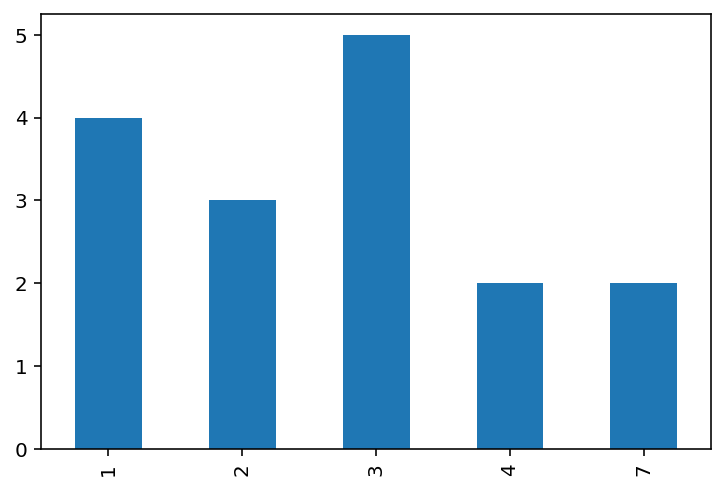

In [9]:
freq_table['age'].value_counts(sort=False).plot.bar();

## Contingency table

Frequency tables are good to visualize univariate distributions or single variables. To look at the joint frequency of two variables, we can use a contingency table which is a method to organize values by the number of occurrences of each instance among pairs of variables.

📓  **Contingency table**: 
> Method to organize values by the number of occurrences of each instance among pairs of variables.

Take for instance:

In [10]:
cross_frequencies = {'smoking': ["Yes", "No", "Yes", "Yes", "Yes", "No",
                                 "No", "No", "Yes", "No", "No", "No"],
                     'nationality': ["Japanese", "Uruguayo", "Japanese",
                                    "Japanese", "Japanese", "Japanese",
                                    "Uruguayo", "Uruguayo", "Uruguayo",
                                    "Uruguayo", "Uruguayo", "Japanese"]}

cross_table = pd.DataFrame.from_dict(cross_frequencies)

pd.crosstab(cross_table['nationality'], cross_table['smoking'])

smoking,No,Yes
nationality,,
Japanese,2,4
Uruguayo,5,1


The contingency above shows the number of times an individual declared to smoke according to their nationality. A simple way to represent contingency tables graphically is with stacked bars:

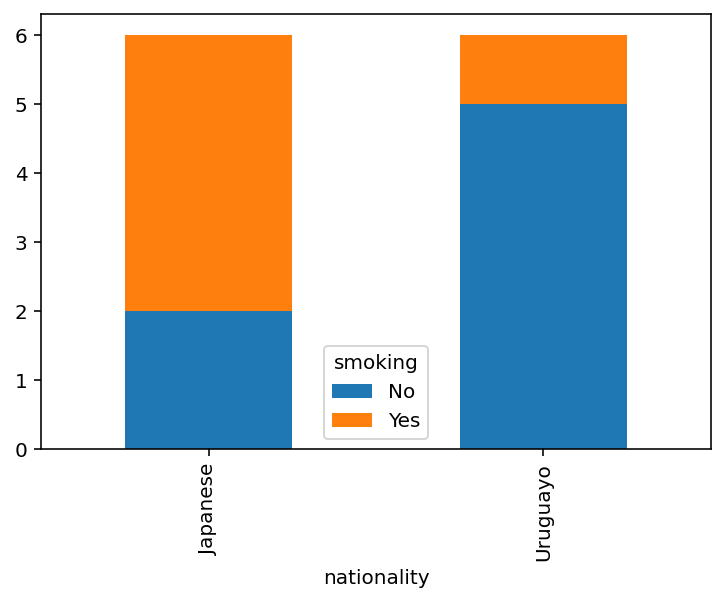

In [11]:
pd.crosstab(cross_table['nationality'], cross_table['smoking']).plot.bar(stacked=True);

## Percentiles and quartiles

There are cases where dividing the data into subgroups is useful, for instance, you may want to know what values are part of the first 25% of the data. Percentiles are **numbers indicating the value of a variable below which a certain percentage of the data belongs**. 

📓  **Percentiles**: 
> Numbers indicating the value of a variable below which a certain percentage of the data belongs.

Quartiles are an extension of percentiles, indicating the **values that mark the 25%, 50%, and 75% percentiles in a given variable**. They are called quartiles because such values divide the data into fourth parts or quarts. 

📓  **Percentiles**: 
> Values that mark the 25%, 50%, and 75% percentiles in a given variable.

Percentiles and quantiles will come in handy to understand data distribution and the variability of a dataset.

## Data distribution

Data distribution refers to **the shape that a variable take when put together in a graphical representation like a histogram**. Histograms are essentially bar plots with bars arranged side-by-side and where each bar can vary regarding the range of data that captures.

📓  **Data distribution**: 
> Shape that a variable take when put together in a graphical representation like a histogram.

Data distribution **must not be confounded with probability distribution**. Data distribution is a general term to refer to the organization of a dataset without any reference to a theoretical sample space or population. Probability distributions are mathematical functions describing the likelihood of a random variable taking some value, which is based on a series of assumptions we do not make here. Data distribution can be compared against theoretical probability distribution in a hypothesis testing setting.

The main purpose of a data distribution is to show in a concise manner several characteristics of the dataset. The key elements to look at in a distribution are **whether the data is centered around none, one, or many points**, and **how dispersion of the data around its center**. 

### Unimodal and symmetric

Unimodal and symmetric distributions have a single peak where most data is concentrated. The frequency of values decreases as you get farther away from the peak. In statistics, this type of distribution is known as a normal distribution.

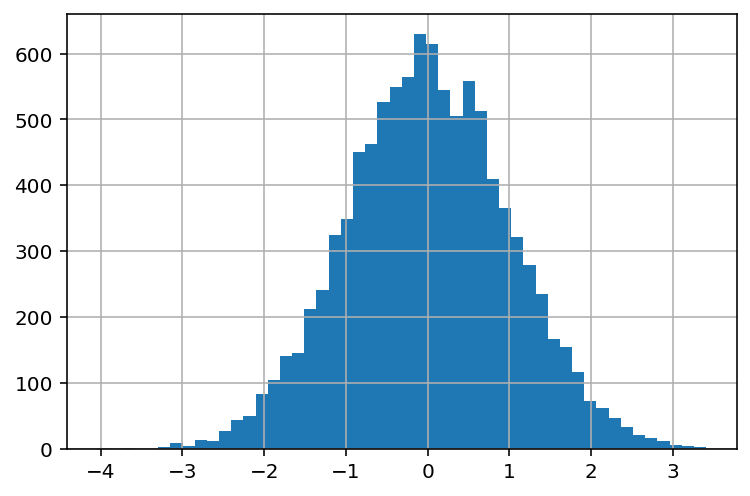

In [12]:
distribution_center = skewnorm.rvs(0, size=10000)
distribution_center = pd.Series(distribution_center)
distribution_center.hist(bins=50);

### Right Skewed

Right skewed or positively distributed data have one peak where most data is concentrated on the left. The frequency of values decreases as you move to the right in the distribution. It's called "right" skewed because the "tail" of the distribution is longer towards the right. 

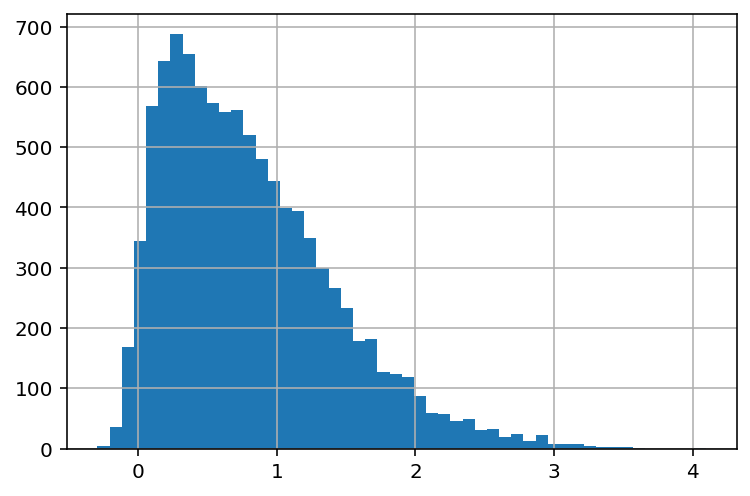

In [13]:
distribution_sr = skewnorm.rvs(10, size=10000)
distribution_sr = pd.Series(distribution_sr)
distribution_sr.hist(bins=50);

### Left skewed

Left skewed or negatively distributed data have one peak where most data is concentrated on the right. The frequency of values decreases as you move to the left in the distribution. It's called "left" skewed because the "tail" of the distribution is longer towards the left. 

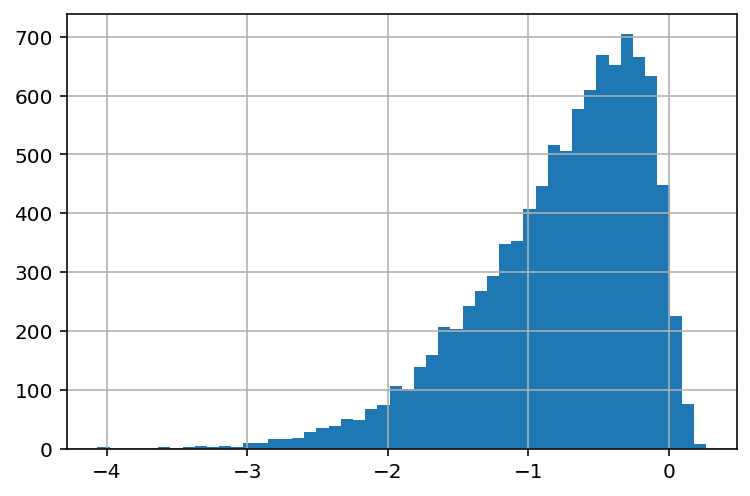

In [14]:
distribution_sl = skewnorm.rvs(-10, size=10000)
distribution_sl = pd.Series(distribution_sl)
distribution_sl.hist(bins=50);

### Bimodal

Bimodal distributed data has two instead of one peak where most data is concentrated. This is usually indicative of two distinctive groups in your data in that variable.

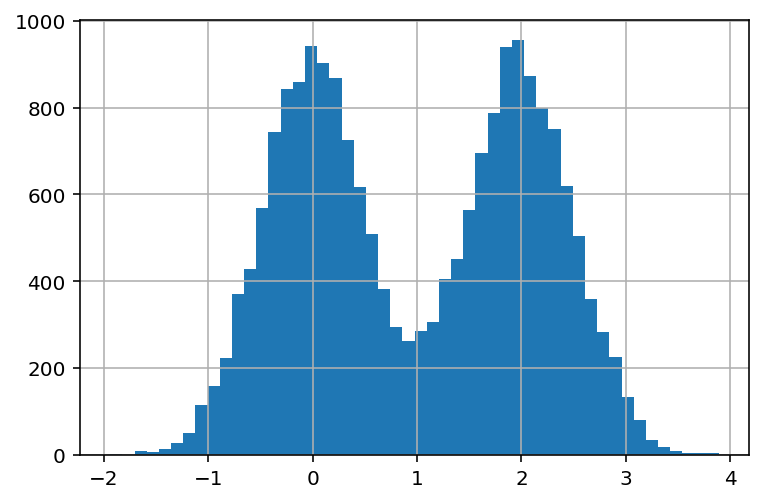

In [15]:
mu1, mu2, sigma = 0, 2, 0.5 
s1 = np.random.normal(mu1, sigma, 10000)
s2 = np.random.normal(mu2, sigma, 10000)
distribution_bi = pd.concat([pd.Series(s1), pd.Series(s2)])
distribution_bi.hist(bins=50);

### Multimodal

Multimodal distributed data has multiple peaks (instead of one or two) where most data is concentrated. This is usually indicative of multiple distinctive groups in your data in that variable.

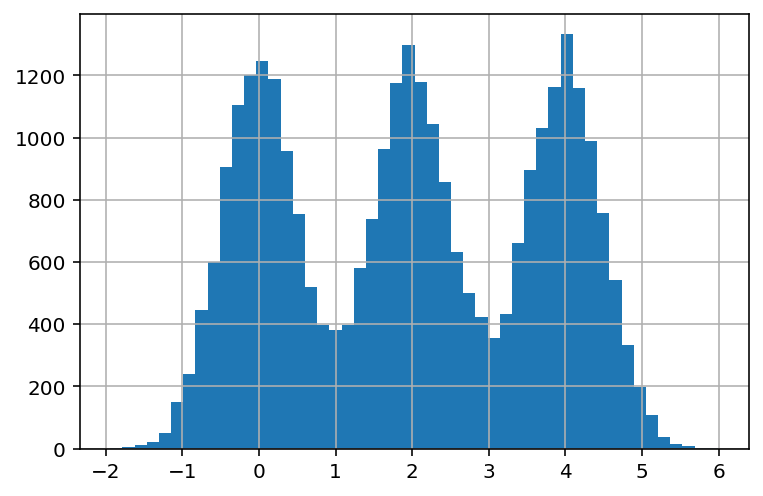

In [16]:
mu3 = 4
s3 = np.random.normal(mu3, sigma, 10000)
distribution_mul = pd.concat([distribution_bi, pd.Series(s3)])
distribution_mul.hist(bins=50);

### Completely symmetric

Symmetrically distributed data does not have any distinctive peak, indicating that instances are evenly distributed among the range of values for that variable.

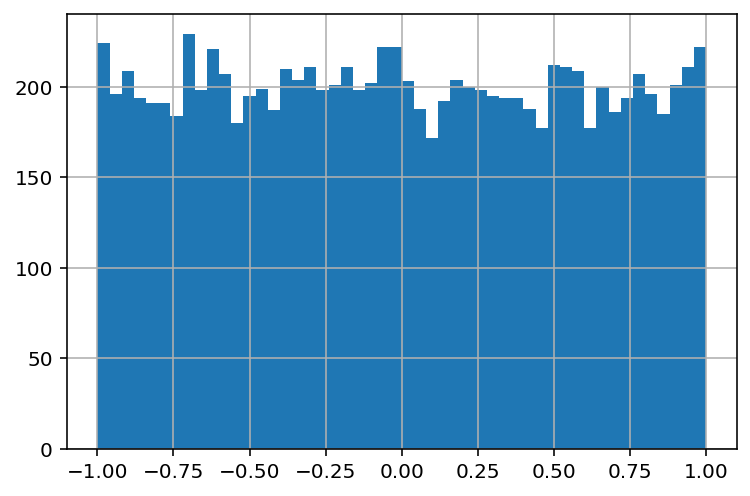

In [17]:
s4 = np.random.uniform(-1,1,10000)
distribution_sym = pd.Series(s4)
distribution_sym.hist(bins=50);

## Measures of central tendency

In nature and society, most things that we measure tend to cluster around one or multiple centers, as we saw in the cases of data distributions. Measures of central tendency are **scores aimed to capture and communicate the most frequently occurring values for a given variable**. 

📓  **Measures of central tendency**: 
> Scores aimed to capture and communicate the most frequently occurring values for a given variable.

As you may imagine, there are multiple ways to describe what is "at the center" of something or to count the "most frequently occurring" value or instance. Here I'll briefly review the three more popular ones: the **mean**, the **median**, and the **mode**.  

### Mean 

It turns out that there are multiple kinds of means in mathematics. In most cases, we will be referring to the arithmetic mean or average, which is defined as:

$$
mean = \frac{1}{n}\sum_{i=1}^{n}x_i = \frac{x_1 + x_2 + ... + x_n}{n}
$$

Put simply, the sum of each value divided by the total number of values.

In `pandas` we can use the `mean` method to compute the mean of any numerical variable:

In [18]:
ages = {'age': np.repeat([18, 19, 19, 20, 21, 21, 21], 10)}

ages_data = pd.DataFrame.from_dict(ages)

ages_data.mean()

age    19.857143
dtype: float64

### Median

The median is the midpoint  of a distribution, meaning that half of the values will be above the median and the other half below the median. Finding the median usually proceed by sorting the values in a variable and then using some computationally efficient search algorithm that we do not need to know about. If you are interested in median-finding algorithms [check this article](https://brilliant.org/wiki/median-finding-algorithm/).

In `pandas` we can use the `median` method.

In [19]:
ages_data.median()

age    20.0
dtype: float64

### Mode

The mode measures the value of a variable that is repeated the most. Similarly to the median, computers implement some version of sorting and/or mode-finding algorithm to solve this problem for us.  

In `pandas` we can check the mode by constructing a sorted frequency table with the `value_counts` method or with the `mode` method.

In [20]:
ages_data['age'].value_counts()

21    30
19    20
20    10
18    10
Name: age, dtype: int64

From the frequency table we can see that age 21 is the mode. `Pandas` also have a custom method for the mode:

In [21]:
ages_data.mode()

,age
0,21


## Measures of dispersion

Learning about how data is clustered is good, but to obtain a more complete picture of our data with also want to examine how varies around its center(s). There are even cases where you will find distributions with the same or similar mean, median, and mode, yet distributed in widely different manners. Measures of dispersion are **scores aimed to capture and communicate how values are dispersed around its center for a given variable**. 

📓  **Measures of dispersion**: 
> Scores aimed to capture and communicate how values are dispersed around its center for a given variable.

Take the example below:

In [22]:
s1 = pd.Series(np.random.normal(1, 3, 10000))
s2 = pd.Series(np.random.normal(1, 2, 10000))
s3 = pd.Series(np.random.normal(1, 1, 10000))

print (f'Mean series-1: {np.round(s1.mean(), 3)}\n'
       f'Mean series-2: {np.round(s2.mean(), 3)}\n'
       f'Mean series-3: {np.round(s3.mean(), 3)}')

Mean series-1: 0.988
Mean series-2: 1.001
Mean series-3: 1.0


Although the three series have nearly identical means, plotting reveals that they have different shapes:

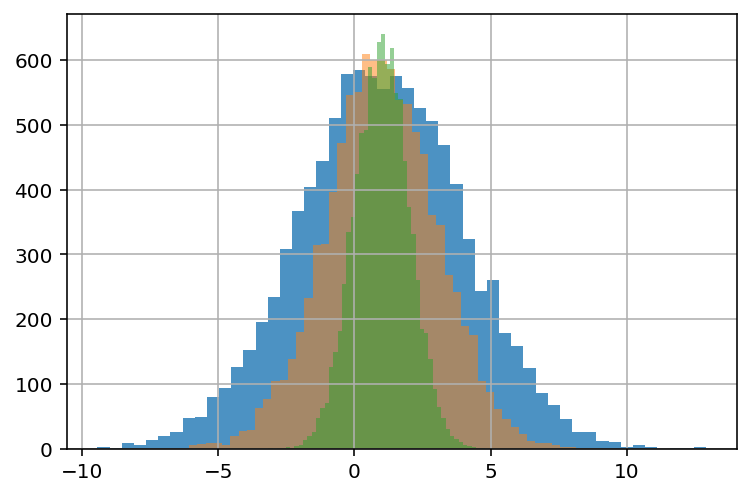

In [23]:
s1.hist(bins= 50, alpha= 0.8);
s2.hist(bins= 50, alpha= 0.5);
s3.hist(bins= 50, alpha= 0.5);

### Range

The range of variables is a score describing the difference between the largest and smallest value. It is useful to get a sense of what are the limits of variables and to catch unusual values. It's computed as:

$$
range = max - min
$$

In `pandas` we compute the range as:

In [24]:
ages_data.max() - ages_data.min()

age    3
dtype: int64

### Interquartile range

The interquartile range (IQR) of a variable is a **score measuring the difference between the 75th and 25th percentiles of a variable, or the difference between the first and third quartiles**. Is computed as:

$$
IQR = Q_3 - Q_1
$$

In `pandas` we compute the IQR as:

In [25]:
ages_data.quantile(.75) - ages_data.quantile(.25)

age    2.0
dtype: float64

### Variance

Put simply, the variance is a **score measuring the spread of a set of values around their average value**. The variance has a more technical definition in probability theory, which mathematically can be expressed as:

$$
S^2 = \frac{\sum_{i=1}^n(x_i-\hat{x})^2}{n-1}
$$

Where $S^2$ is the variance, $x_i$ is a single value, $\hat{x}$ is the mean of all values, and $n$ is the total number of values.

The variance plays a central role in probability theory and hypothesis testing, but in the context of exploratory data analysis, its main purpose is to help to better understand the shape of a distribution.

In `pandas` we can compute the variance as:

In [26]:
ages_data.var()

age    1.283644
dtype: float64

### Standard deviation

Informally, the standard deviation (SD) has the same meaning that the variance: **a score measuring the spread of a set of values around their average value**. The key difference is that **the SD is expressed in the same units as the mean**. This makes the SD the preferred option when describing the dispersion of the data in exploratory data analysis. Mathematically, the SD is the square root of the variance: 

$$
\sigma^2 = \sqrt{\frac{\sum_{i=1}^n(x_i-\hat{x})^2}{n-1}}
$$

In `pandas` we can compute the standard deviation as:

In [27]:
ages_data.std()

age    1.13298
dtype: float64

## Summary tables

In the previous sections, we examined and computed measures of central tendency and dispersion one by one. Normally you would not do this as it's time-consuming and cumbersome. Summary tables are a way to put together several measures of central tendency and dispersion to obtain a quick overview of the dataset. `Pandas` provides the `describe` method to construct summary tables:

In [28]:
ages_data.describe()

,age
count,70.000000
mean,19.857143
std,1.132980
min,18.000000
25%,19.000000
50%,20.000000
75%,21.000000
max,21.000000
